We would be using the Historical Data from FTX

* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day

* High, Low represent the Maximum and Minimum of the price of that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
df = pd.read_csv('data_ftx.csv')

# Explanatory Data Analysis

In [57]:
df.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,12.564,12.767,11.998,12.735,75247.12504,2020-04-01
1,1,12.746,13.740,12.578,13.021,121868.83307,2020-04-02
2,2,13.025,13.574,12.921,13.361,72371.01300,2020-04-03
3,3,13.359,14.078,13.170,13.770,272417.78490,2020-04-04
4,4,13.770,13.965,13.413,13.698,119255.84893,2020-04-05


In [58]:
df.shape

(761, 7)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  761 non-null    int64  
 1   open        761 non-null    float64
 2   high        761 non-null    float64
 3   low         761 non-null    float64
 4   close       761 non-null    float64
 5   volume      761 non-null    float64
 6   date        761 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 41.7+ KB


In [60]:
df.describe()

,Unnamed: 0,open,high,low,close,volume
count,761.000000,761.000000,761.000000,761.000000,761.000000,7.610000e+02
mean,380.000000,254.811114,264.467917,244.000716,255.303045,3.050173e+07
std,219.826068,211.685466,218.851353,203.110878,211.554897,4.020201e+07
min,0.000000,12.564000,12.767000,11.998000,12.735000,2.104170e+04
25%,190.000000,27.723000,28.435000,26.934000,27.747000,1.412170e+06
50%,380.000000,300.617000,313.418000,281.530000,300.927000,2.117040e+07
75%,570.000000,421.400000,433.200000,407.572000,421.400000,4.558100e+07
max,760.000000,676.530000,693.567000,635.199000,676.530000,3.645719e+08


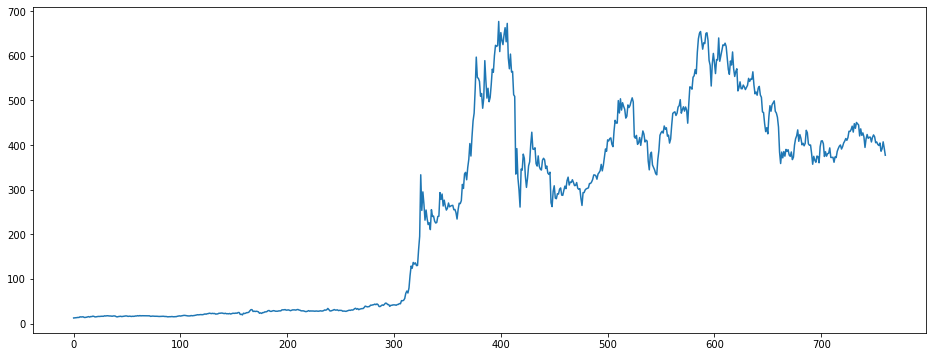

In [61]:
df['open'].plot(figsize=(16,6))

In [62]:
x = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Machine Learning

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Dividing our data into train and test data so can train it

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
x_train.shape

(608, 4)

In [66]:
x_test.shape

(153, 4)

Call the model and fit it

In [68]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
predicted = model.predict(x_test)

In [71]:
print(x_test)

        open     high      low        volume
60    17.735   18.160   16.857  4.711559e+05
619  553.400  573.201  542.611  4.760473e+07
308   51.046   52.733   49.902  2.572746e+06
377  596.704  602.367  530.875  1.686128e+08
459  298.289  315.000  292.835  1.775325e+07
..       ...      ...      ...           ...
127   23.289   23.309   22.567  5.074731e+05
480  301.811  304.361  292.780  3.183189e+07
690  399.911  400.187  375.100  2.446950e+07
152   23.613   23.904   22.985  4.038935e+05
207   30.683   31.006   29.951  6.800665e+05

[153 rows x 4 columns]


In [72]:
df1 = pd.DataFrame(y_test, predicted)

## Check how the prices goes Higher and Lower

In [75]:
dfr = pd.DataFrame({'Higher-in-one-hour': y_test, 'Lower-in-one-hour': predicted})

In [76]:
print(dfr)

     Higher-in-one-hour  Lower-in-one-hour
60               17.065            17.1981
619             564.442           562.7700
308              52.245            52.2609
377             551.050           569.1706
459             307.800           302.9411
..                  ...                ...
127              22.746            22.9808
480             302.858           297.0696
690             380.758           378.8964
152              23.136            23.7823
207              30.194            30.5682

[153 rows x 2 columns]


In [77]:
dfr.head(10)

,Higher-in-one-hour,Lower-in-one-hour
60,17.065,17.1981
619,564.442,562.7700
308,52.245,52.2609
377,551.050,569.1706
459,307.800,302.9411
400,634.128,639.3563
354,264.817,253.9604
180,26.952,27.6211
532,431.339,421.3328
374,471.216,476.0672


In [78]:
model.score(x_test, y_test)

0.9977444532852894

# I am getting 99% accuracy